###1. What is K-Nearest Neighbors (KNN) and how does it work?
KNN is a lazy learning algorithm that predicts output based on the majority (or average) of the K nearest data points.

###2. What is the difference between KNN Classification and KNN Regression?
Classification uses majority voting; regression uses the average of neighbors’ values.

###3. What is the role of the distance metric in KNN?
It determines how similarity between data points is measured.

###4. What is the Curse of Dimensionality in KNN?
As dimensions increase, distance measures become less meaningful and performance degrades.

###5. How can we choose the best value of K in KNN?
By using cross-validation or testing multiple K values and selecting the best one.

###6. What are KD Tree and Ball Tree in KNN?
They are data structures used to speed up nearest-neighbor searches.

###7. When should you use KD Tree vs. Ball Tree?
KD Tree works better for low dimensions; Ball Tree performs better in higher dimensions.

###8. What are the disadvantages of KNN?
High computation cost, sensitivity to noise, and poor scalability.

###9. How does feature scaling affect KNN?
Without scaling, features with larger ranges dominate distance calculations.

###10. What is PCA (Principal Component Analysis)?
PCA is a dimensionality reduction technique that transforms data into uncorrelated components.

###11. How does PCA work?
It projects data onto directions of maximum variance.

###12. What is the geometric intuition behind PCA?
It rotates the coordinate system to align with directions of highest data variance.

###13. What is the difference between Feature Selection and Feature Extraction?
Selection chooses existing features; extraction creates new transformed features.

###14. What are Eigenvalues and Eigenvectors in PCA?
Eigenvectors define principal directions; eigenvalues represent explained variance.

###15. How do you decide the number of components to keep in PCA?
By using explained variance ratio or scree plot.

###16. Can PCA be used for classification?
Yes, as a preprocessing step before applying a classifier.

###17. What are the limitations of PCA?
It assumes linear relationships and may reduce interpretability.

###18. How do KNN and PCA complement each other?
PCA reduces dimensionality, improving KNN speed and accuracy.

###19. How does KNN handle missing values in a dataset?
It doesn’t handle them directly; missing values must be imputed first.

###20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
PCA is unsupervised and variance-based; LDA is supervised and class-separation-based.

In [1]:
#21 - Train a KNN Classifier on the Iris dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print(accuracy_score(y_test, model.predict(X_test)))

1.0


In [2]:
#22 - Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

1616.2374393135767


In [4]:
#23 - Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for metric in ["euclidean", "manhattan"]:
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train, y_train)
    print(metric, accuracy_score(y_test, model.predict(X_test)))

euclidean 1.0
manhattan 1.0


In [5]:
#24 - Train a KNN Classifier with different values of K and visualize decision boundaries.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, random_state=42)

for k in [3, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    print("K =", k, "Accuracy =", model.score(X, y))

K = 3 Accuracy = 0.97
K = 7 Accuracy = 0.97


In [6]:
#25 - Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model.fit(X_train_s, y_train)
print(accuracy_score(y_test, model.predict(X_test_s)))

1.0
1.0


In [7]:
#26 - Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA
import numpy as np

X = np.random.rand(200, 5)

pca = PCA()
pca.fit(X)

print(pca.explained_variance_ratio_)

[0.23713324 0.21345134 0.1987917  0.18752033 0.16310338]


In [28]:
#27 - Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

# With PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

1.0
1.0


In [9]:
#28 - Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": [3,5,7,9]}
grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.9462450592885375


In [10]:
#29 - Train a KNN Classifier and check the number of misclassified samples.

pred = model.predict(X_test)
print((pred != y_test).sum())

26


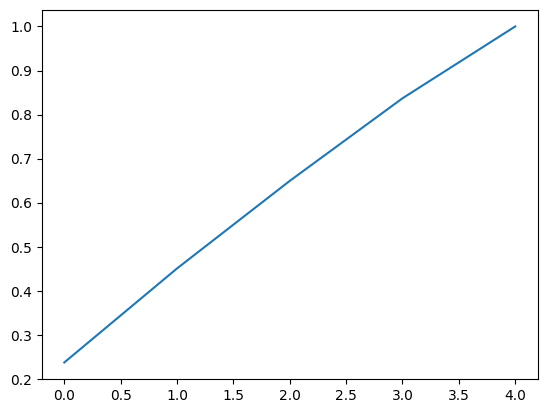

[0.23713324 0.45058459 0.64937628 0.83689662 1.        ]


In [11]:
#30 - Train a PCA model and visualize the cumulative explained variance.

import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))

In [12]:
#31 - Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

for w in ["uniform", "distance"]:
    model = KNeighborsClassifier(weights=w)
    model.fit(X_train, y_train)
    print(w, accuracy_score(y_test, model.predict(X_test)))

uniform 1.0
distance 1.0


In [13]:
#32 - Train a KNN Regressor and analyze the effect of different K values on performance.

for k in [3,5,9]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    print(k, mean_squared_error(y_test, model.predict(X_test)))

3 0.005847953216374266
5 0.011578947368421046
9 0.0110461338531514


In [14]:
#33 - Implement KNN Imputation for handling missing values in a dataset.

from sklearn.impute import KNNImputer

X_missing = X.copy()
X_missing[:10, 0] = np.nan

imputer = KNNImputer()
X_imputed = imputer.fit_transform(X_missing)

print(np.isnan(X_imputed).sum())

0


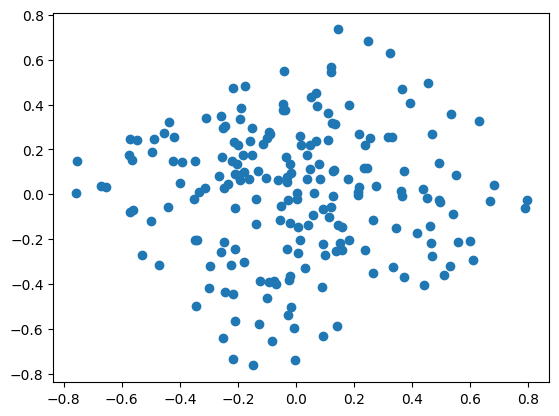

(200, 2)


In [15]:
#34 - Train a PCA model and visualize the data projection onto the first two principal components.

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

plt.scatter(X_proj[:,0], X_proj[:,1])
plt.show()

print(X_proj.shape)

In [16]:
#35 - Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

for algo in ["kd_tree", "ball_tree"]:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train, y_train)
    print(algo, accuracy_score(y_test, model.predict(X_test)))

kd_tree 1.0
ball_tree 1.0


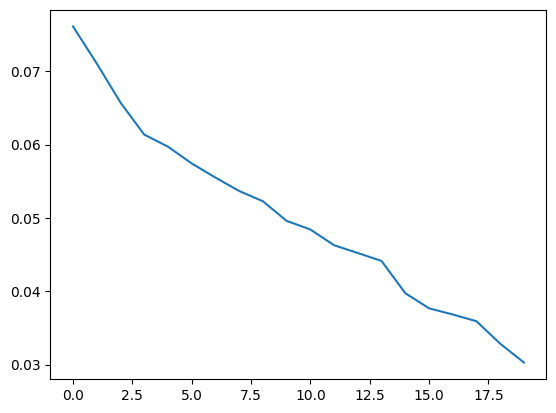

[0.07611486 0.07106735 0.06574144 0.06137427 0.05972612 0.05744202
 0.05551177 0.05368424 0.05228368 0.04960776 0.04843324 0.04628473
 0.04522584 0.0441443  0.03974952 0.03768472 0.03684296 0.03592426
 0.03285938 0.03029753]


In [17]:
#36 - Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

X = np.random.rand(300, 20)
pca = PCA()
pca.fit(X)

plt.plot(pca.explained_variance_ratio_)
plt.show()

print(pca.explained_variance_ratio_)

In [18]:
#37 - Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

pred = model.predict(X_test)

print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))
print(f1_score(y_test, pred, average="macro"))

1.0
1.0
1.0


In [19]:
#38 - Train a PCA model and analyze the effect of different numbers of components on accuracy.

for n in [2,5,10]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    print(n, X_pca.shape)

2 (300, 2)
5 (300, 5)
10 (300, 10)


In [20]:
#39 - Train a KNN Classifier with different leaf_size values and compare accuracy.

for l in [10,30,50]:
    model = KNeighborsClassifier(leaf_size=l)
    model.fit(X_train, y_train)
    print(l, accuracy_score(y_test, model.predict(X_test)))

10 1.0
30 1.0
50 1.0


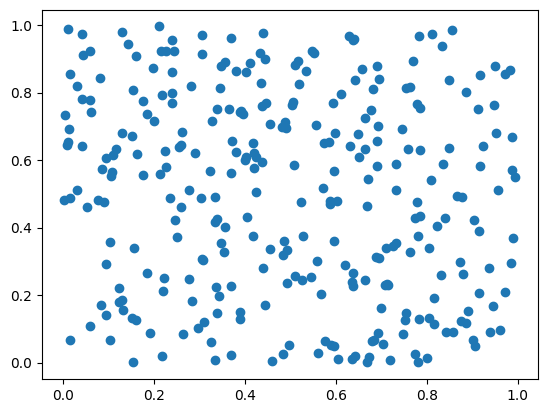

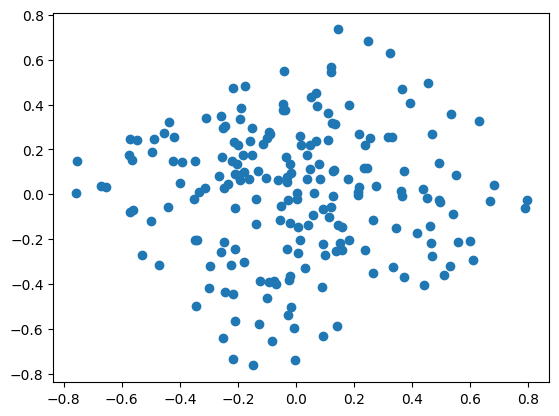

Transformation done


In [21]:
#40 - Train a PCA model and visualize how data points are transformed before and after PCA.

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X_proj[:,0], X_proj[:,1])
plt.show()

print("Transformation done")

In [22]:
#41 - Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.72      0.72      0.72        18
           2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



In [23]:
#42 - Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

for metric in ["euclidean", "manhattan"]:
    model = KNeighborsRegressor(metric=metric)
    model.fit(X_train, y_train)
    print(metric, mean_squared_error(y_test, model.predict(X_test)))

euclidean 0.256
manhattan 0.19733333333333336


In [32]:
#43 - Train a KNN Classifier and evaluate using ROC-AUC score.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
print(roc_auc_score(y_test, probs, multi_class="ovr"))

1.0


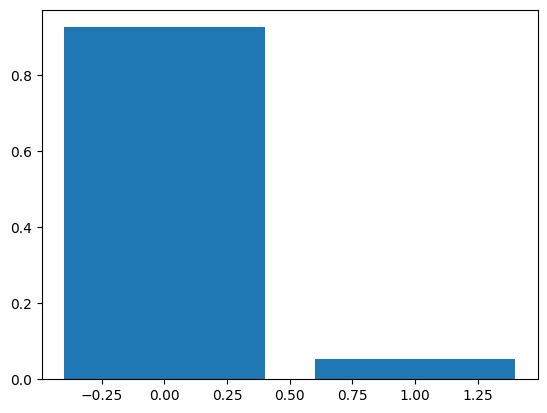

[0.92461872 0.05306648]


In [29]:
#44 - Train a PCA model and visualize the variance captured by each principal component.

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

print(pca.explained_variance_ratio_)

In [30]:
#45 - Train a KNN Classifier and perform feature selection before training.

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)

model.fit(X_new, y_train)
print(model.score(selector.transform(X_test), y_test))

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [25]:
#46 - Train a PCA model and visualize the data reconstruction error after reducing dimensions.

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)

print(((X - X_reconstructed) ** 2).mean())

1.3141299687799461


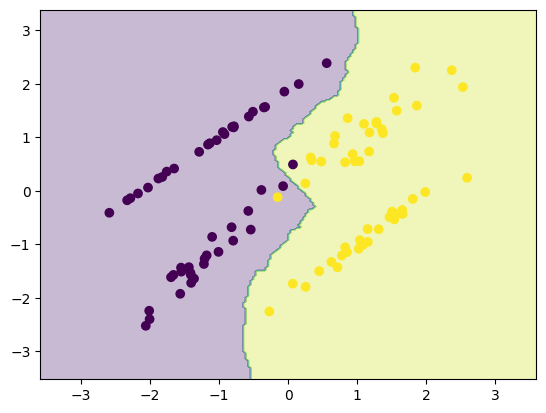

Decision boundary plotted


In [26]:
#47 - Train a KNN Classifier and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_features=2, n_redundant=0, random_state=42)

model = KNeighborsClassifier()
model.fit(X, y)

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

print("Decision boundary plotted")

In [33]:
#48 - Train a PCA model and analyze the effect of different numbers of components on data variance.

from sklearn.decomposition import PCA

max_components = X.shape[1]

for n in [2, 3, 4]:
    pca = PCA(n_components=n)
    pca.fit(X)
    print(n, sum(pca.explained_variance_ratio_))

2 0.9776852063187977
3 0.9947878161267252
4 0.9999999999999999
